In [1]:
from tensorflow.keras import datasets 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.api as sm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
plt.style.use('seaborn')

2022-11-16 23:00:07.185737: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
crop_name = {
    1 : ['Rice' , 'Mango', 'Papaya' ],
    2 : ['Cotton', 'Jute', 'Watermelon', 'Muskmelon', 'Banana', 'Orange'],
    3 : ['Jute', 'Watermelon', 'Muskmelon'],
    4 : ['Rice', 'Jute', 'Watermelon', 'Muskmelon', 'Cotton', 'Jute',  'Banana', 'Orange' ],
    5 : ['Pomegranate'],
    6 : ['Apple', 'Grape', 'Pomegranate'],
    7 : ['Lentil'],
    8 : ['Lentil' , 'Jute', 'Watermelon', 'Muskmelon']
}


# Feature Selection and PreProcessing

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df

,id,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,B,Mo,Tex,District,label
0,0,7.050000,0.160000,5.560000,175.620000,38.260000,324.800000,5.210000,1884,288.000000,1.820000,0.200000,2.830000,2.800000,0.230000,0.130000,2,0,6
1,1,6.880000,0.089000,4.240000,125.440000,26.300000,103.000000,10.420000,1484,336.000000,1.620000,0.450000,6.270000,5.600000,0.230000,0.040000,2,0,7
2,2,5.600000,0.081000,2.780000,150.530000,25.700000,53.800000,7.810000,1644,504.000000,2.840000,0.440000,21.080000,24.110000,0.230000,0.090000,5,0,7
3,3,7.300000,0.164000,10.540000,188.160000,24.700000,190.400000,10.420000,1364,840.000000,7.740000,0.630000,16.420000,11.400000,0.230000,0.210000,2,0,6
4,4,7.220000,0.167000,11.410000,163.070000,40.000000,210.600000,10.420000,2004,168.000000,11.890000,0.610000,7.380000,2.910000,0.120000,0.260000,2,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,2732,6.531352,0.659126,17.283696,507.723181,28.210970,99.076266,464.099932,57,1.407825,0.908700,26.714008,20.307160,8.306451,0.607825,0.728876,14,1,8
2733,2733,6.570766,0.672140,17.198919,507.854437,28.107230,99.429503,462.612618,60,1.410428,0.898288,25.791129,19.426670,8.329504,0.610428,0.745608,14,1,8
2734,2734,6.989972,0.810557,16.297230,509.250472,27.003848,103.186541,446.793514,93,1.438111,0.787555,15.975375,10.061760,8.574701,0.638111,0.923573,16,1,8
2735,2735,6.737222,0.727102,16.840881,508.408768,27.669104,100.921331,456.331240,73,1.421420,0.854319,21.893534,15.708094,8.426866,0.621420,0.816274,15,1,8


In [5]:
X = df.drop(columns=['label','District'])
y = df['label']

In [6]:
X

,id,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,B,Mo,Tex
0,0,7.050000,0.160000,5.560000,175.620000,38.260000,324.800000,5.210000,1884,288.000000,1.820000,0.200000,2.830000,2.800000,0.230000,0.130000,2
1,1,6.880000,0.089000,4.240000,125.440000,26.300000,103.000000,10.420000,1484,336.000000,1.620000,0.450000,6.270000,5.600000,0.230000,0.040000,2
2,2,5.600000,0.081000,2.780000,150.530000,25.700000,53.800000,7.810000,1644,504.000000,2.840000,0.440000,21.080000,24.110000,0.230000,0.090000,5
3,3,7.300000,0.164000,10.540000,188.160000,24.700000,190.400000,10.420000,1364,840.000000,7.740000,0.630000,16.420000,11.400000,0.230000,0.210000,2
4,4,7.220000,0.167000,11.410000,163.070000,40.000000,210.600000,10.420000,2004,168.000000,11.890000,0.610000,7.380000,2.910000,0.120000,0.260000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,2732,6.531352,0.659126,17.283696,507.723181,28.210970,99.076266,464.099932,57,1.407825,0.908700,26.714008,20.307160,8.306451,0.607825,0.728876,14
2733,2733,6.570766,0.672140,17.198919,507.854437,28.107230,99.429503,462.612618,60,1.410428,0.898288,25.791129,19.426670,8.329504,0.610428,0.745608,14
2734,2734,6.989972,0.810557,16.297230,509.250472,27.003848,103.186541,446.793514,93,1.438111,0.787555,15.975375,10.061760,8.574701,0.638111,0.923573,16
2735,2735,6.737222,0.727102,16.840881,508.408768,27.669104,100.921331,456.331240,73,1.421420,0.854319,21.893534,15.708094,8.426866,0.621420,0.816274,15


In [7]:
y

0       6
1       7
2       7
3       6
4       6
       ..
2732    8
2733    8
2734    8
2735    8
2736    8
Name: label, Length: 2737, dtype: int64

In [8]:
y.unique()

array([6, 7, 5, 3, 1, 2, 8])

In [9]:
X = (X - X.mean())/X.std()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2189, 17) (548, 17) (2189,) (548,)


# Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
y_pred = classifer.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

# accuracy
graph = accuracy_score(y_pred,y_test)
graph

1.0

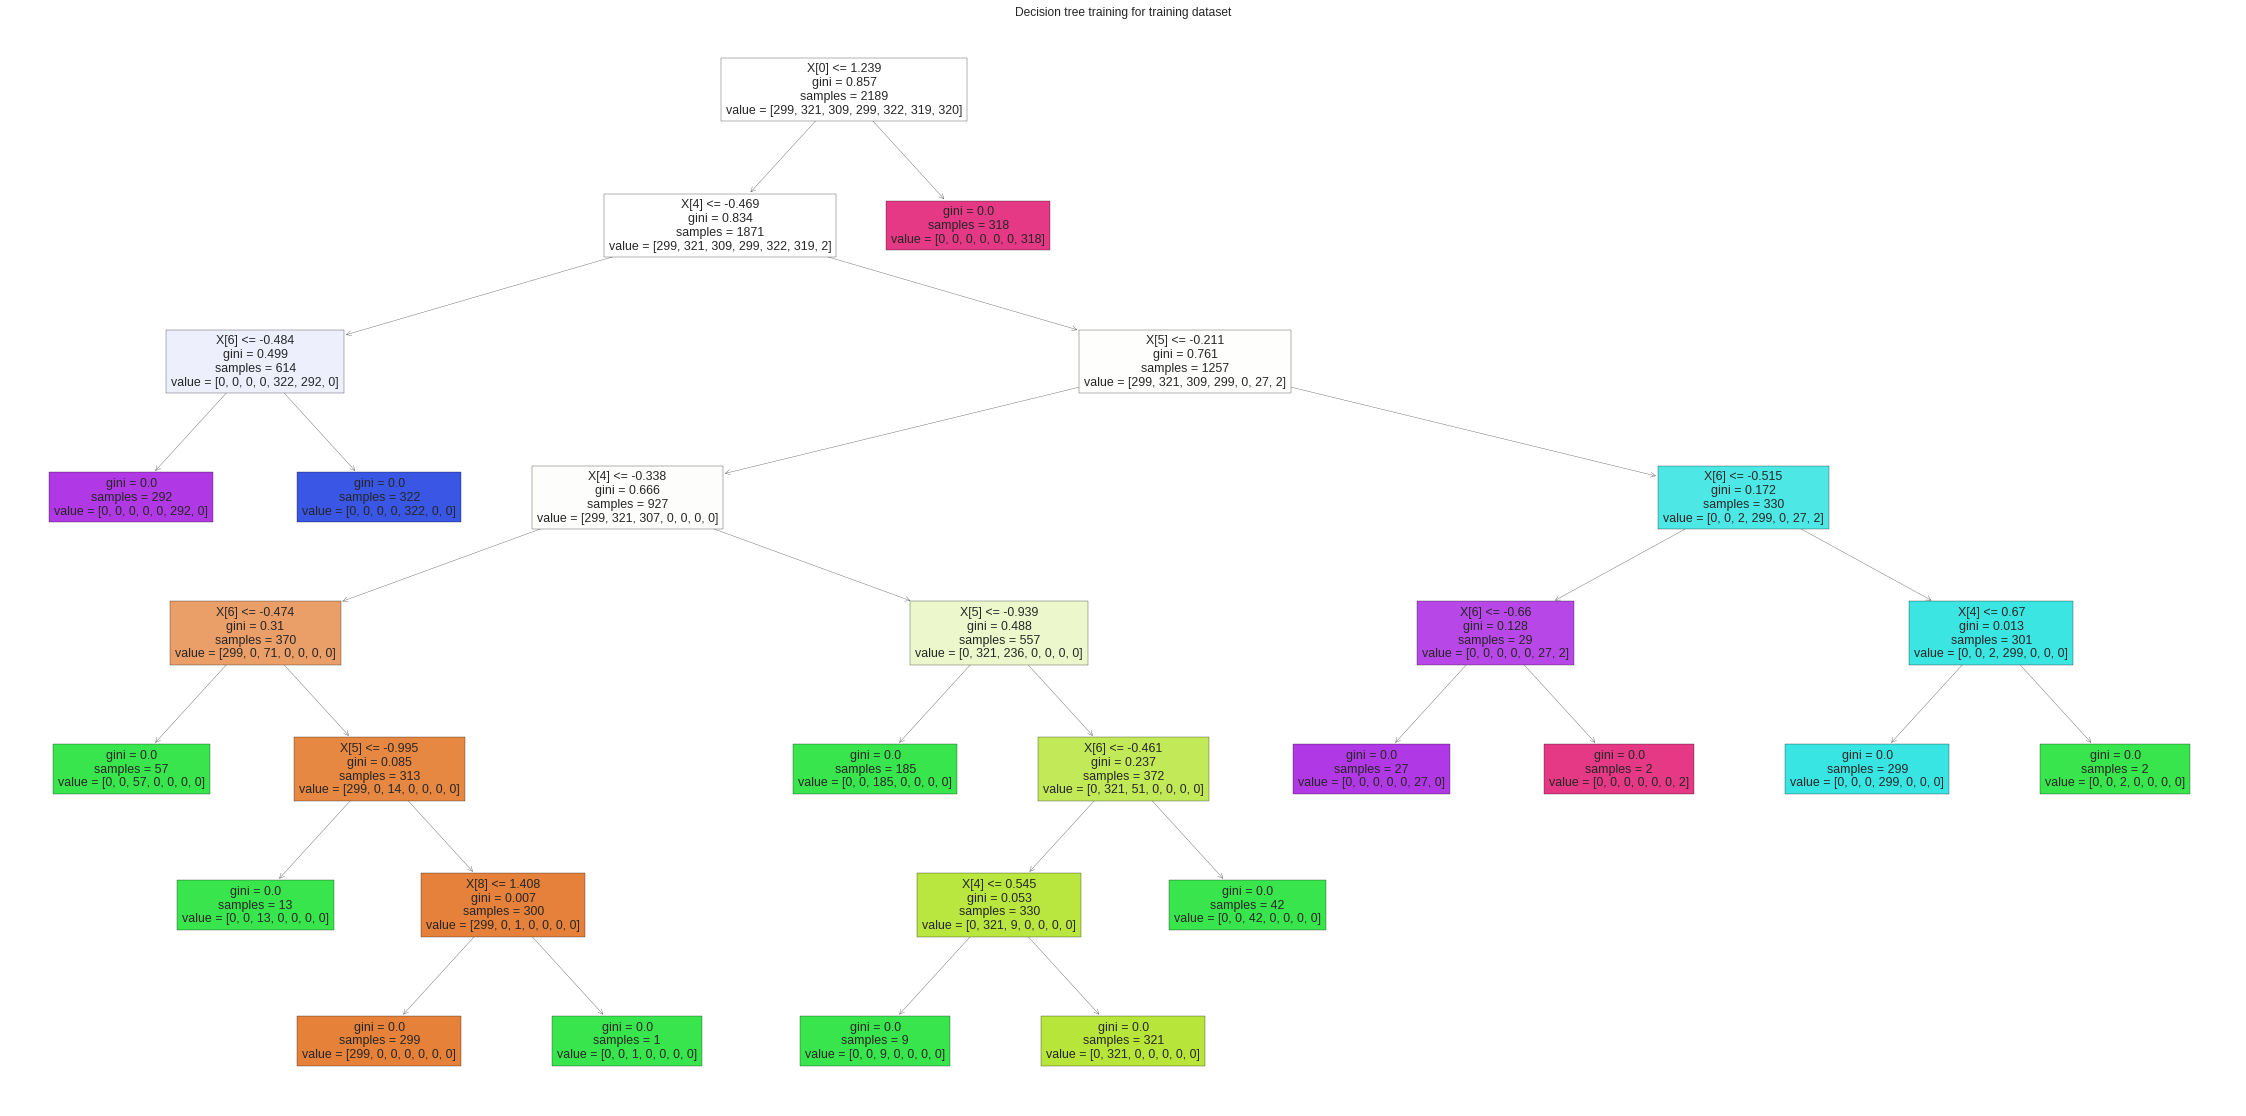

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

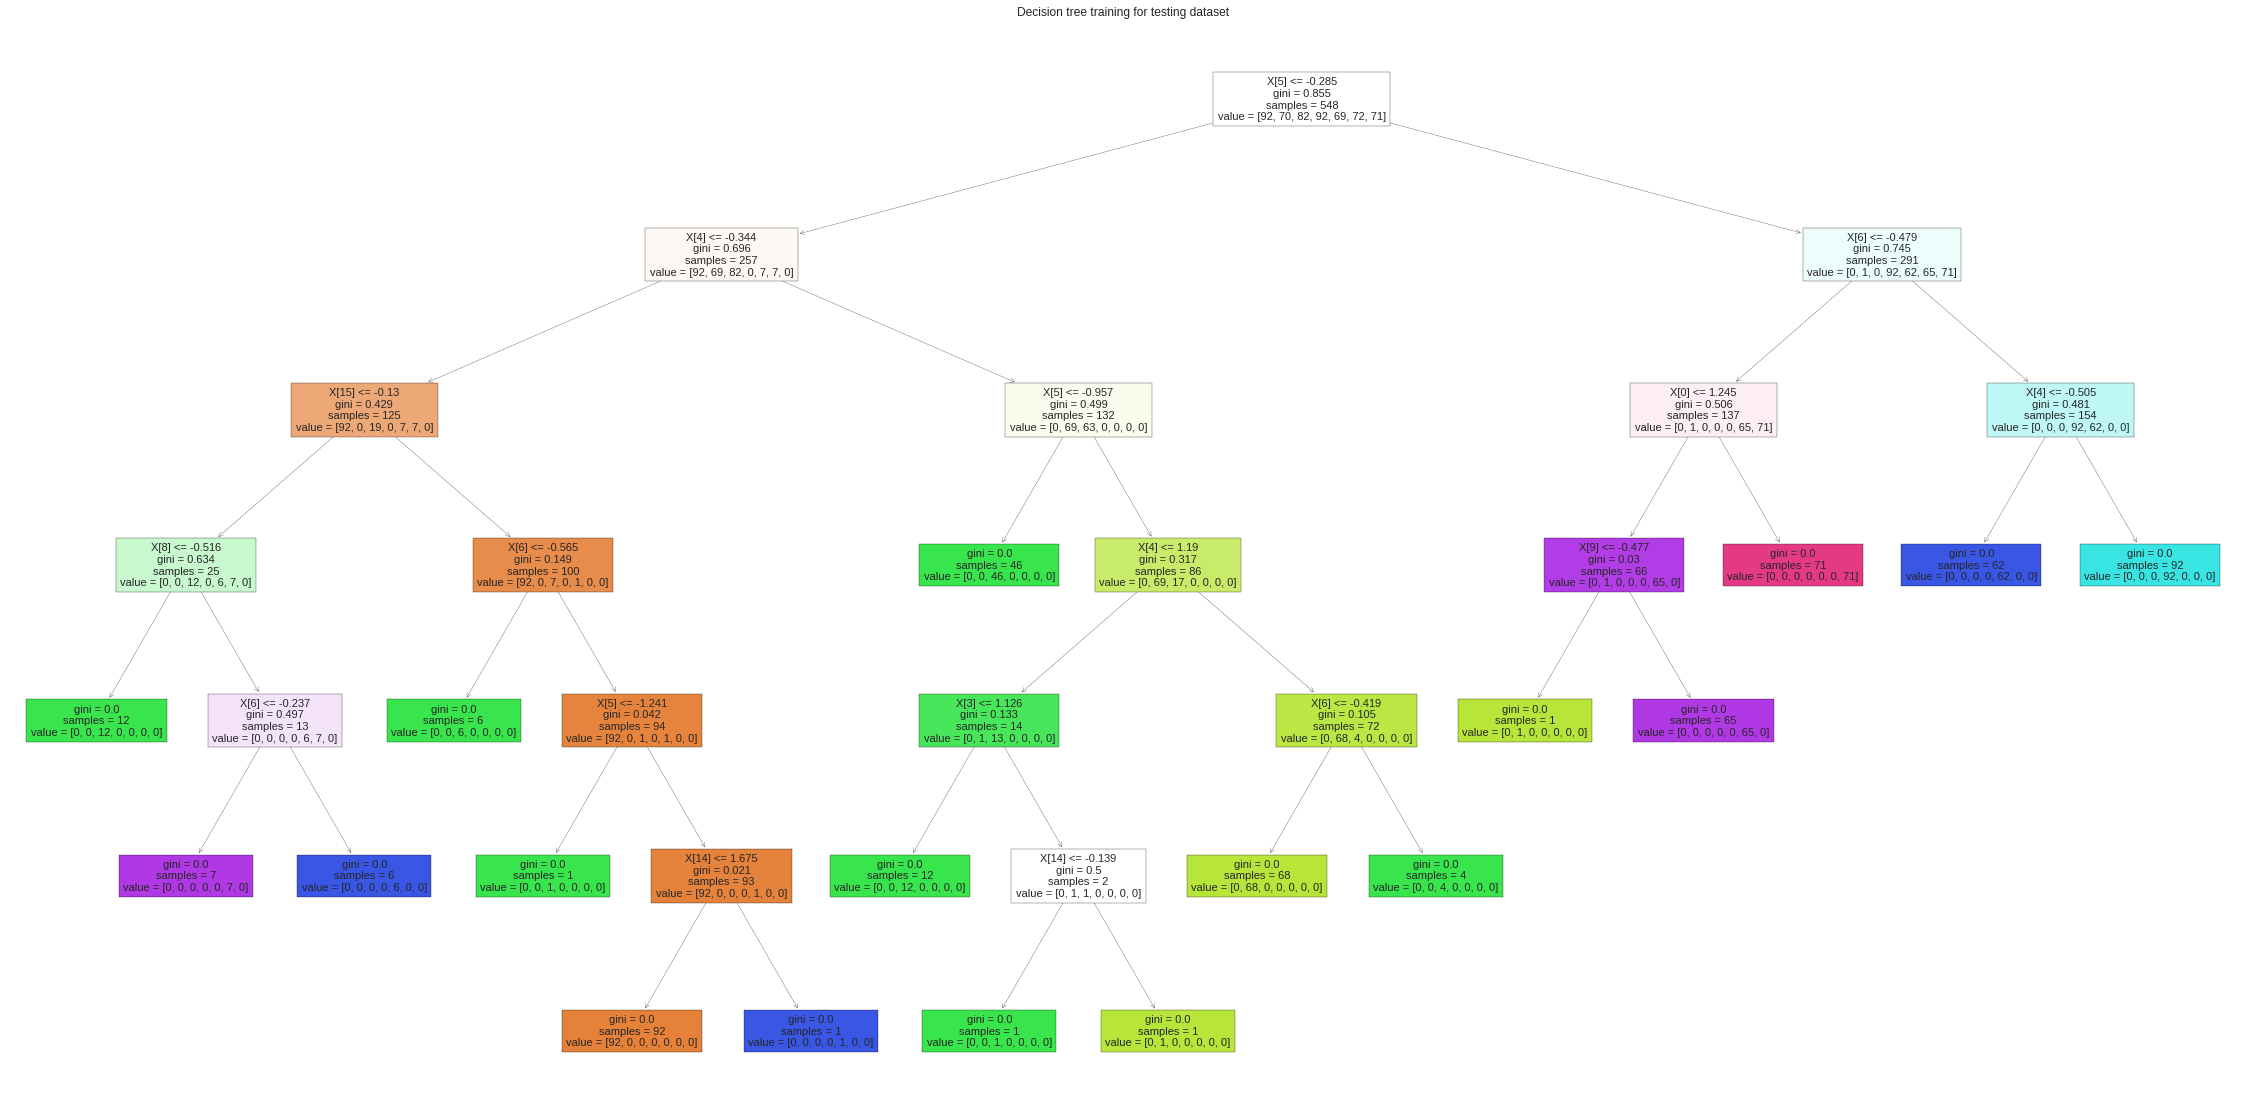

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree training for testing dataset")
plt.show()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        82
           5       1.00      1.00      1.00        92
           6       1.00      1.00      1.00        69
           7       1.00      1.00      1.00        72
           8       1.00      1.00      1.00        71

    accuracy                           1.00       548
   macro avg       1.00      1.00      1.00       548
weighted avg       1.00      1.00      1.00       548



# SVM

In [17]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [18]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [19]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
graph2 = poly_accuracy*100

Accuracy (Polynomial Kernel):  94.34
F1 (Polynomial Kernel):  94.39


In [20]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  74.64
F1 (RBF Kernel):  76.14


In [21]:
print(classification_report(poly_pred, y_test))


              precision    recall  f1-score   support

           1       1.00      0.85      0.92       108
           2       1.00      0.99      0.99        71
           3       0.89      1.00      0.94        73
           5       0.89      1.00      0.94        82
           6       0.94      0.86      0.90        76
           7       0.89      0.96      0.92        67
           8       1.00      1.00      1.00        71

    accuracy                           0.94       548
   macro avg       0.94      0.95      0.94       548
weighted avg       0.95      0.94      0.94       548



# ANN Model-1

In [22]:
X_train

,id,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,B,Mo,Tex
1186,-0.230307,0.707683,2.252683,-1.841786,-0.391326,-0.926686,-0.289916,0.017880,-0.575391,-0.449462,-0.236940,-0.780386,-0.494663,0.714072,-0.170610,-0.070047,1.332731
1326,-0.053148,-1.355170,0.825472,0.483742,1.351835,-0.461650,-0.778533,-0.644089,-0.561742,-0.476114,-0.137377,0.432508,-0.667875,-0.479949,0.070494,-0.105188,-0.076821
1134,-0.296110,0.208277,0.607638,0.937409,-0.398950,-0.595308,0.713667,0.456746,-0.582215,-0.477746,-0.063532,1.262173,-0.577009,-0.226185,-0.065565,-0.055145,0.393030
1675,0.388486,0.913937,2.204339,1.336044,-0.262302,-1.302213,-0.760448,0.581484,-0.459373,-0.474839,-0.233531,-0.287451,0.898838,-0.104190,-0.017716,-0.059626,0.393030
420,-1.199623,-0.755651,-1.113153,-1.052462,-1.118095,1.340037,-0.422515,3.396916,-0.206863,-0.452145,-0.037647,-0.775805,0.995375,1.131081,-0.012152,-0.182239,0.627955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,0.503639,-1.060249,-1.298869,0.816172,-0.307015,1.015229,1.249438,-1.014431,0.889620,2.703451,5.772084,-0.951056,-0.918730,-0.697982,-0.344399,-0.252968,-2.191147
1024,-0.435306,0.557764,-0.006730,0.724328,-0.422246,-0.426465,0.241840,0.193518,-0.585628,-0.478548,-0.685571,0.490377,-0.828608,-0.299813,-0.125673,-0.077093,-0.076821
1388,0.025309,0.314973,0.876606,0.190620,1.338270,-0.549511,-0.638611,-0.307757,-0.452548,-0.477938,0.027012,0.836787,-0.505217,0.662584,-0.248099,-0.091997,0.158105
522,-1.070550,-0.123024,0.118077,-1.485459,-1.255889,1.750322,0.312081,1.809247,-0.377478,-0.413724,1.636718,-0.833620,0.612237,2.176611,-0.219807,-0.223701,0.393030


In [23]:
X_test

,id,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,B,Mo,Tex
2316,1.199623,-1.814263,-1.011212,-1.835291,-1.433747,0.448385,-0.867214,-0.817639,0.227635,-0.448026,-0.535157,-0.907550,1.202253,-0.138135,0.009063,-0.198111,0.393030
185,-1.496998,2.805803,-1.227793,-0.764979,-1.410541,0.069294,-0.295373,-1.006526,1.526581,2.483900,0.313022,-0.793872,-0.541925,3.917111,-0.279507,-0.255407,-1.721297
52,-1.665300,-0.169885,-1.197986,-0.429584,-1.594217,0.259621,2.896461,-1.014431,1.526581,1.441030,-0.543115,-0.929375,3.059886,-0.198587,-0.315847,-0.238335,-1.486372
1754,0.488454,-1.050435,-1.310363,0.453998,-0.329870,0.150485,1.377983,-0.994795,1.082983,0.315899,0.440527,-0.917010,0.709046,2.479561,-0.180355,-0.245034,-1.251447
1458,0.113888,-0.230835,0.341962,1.524188,1.256980,-0.721127,-0.829989,-0.767309,-0.486671,-0.460379,-0.103134,0.779470,0.497693,-0.414647,-0.229382,-0.103912,1.097805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0.141728,-0.801192,0.780549,1.335801,1.213723,-0.507303,-0.724396,0.184007,-0.575391,-0.475813,-0.454303,0.620054,0.627902,-0.334832,-0.079826,-0.105695,-0.546671
581,-0.995890,-1.177402,-0.556004,-0.243253,-0.194288,-1.328523,-0.690094,-0.563901,-0.589040,-0.463032,-0.416748,-0.945636,1.633410,0.749770,-0.266529,-0.182239,-0.076821
108,-1.594436,1.399966,-0.899923,0.422215,-1.318409,0.451087,3.017786,-1.000192,1.299095,1.166590,-0.666323,-0.951658,-0.940895,-1.201066,4.660074,7.100493,-2.660998
951,-0.527682,0.814471,0.208376,2.003092,-0.400154,-0.545409,0.635525,0.440116,-0.589040,-0.476187,0.318417,1.228614,-0.590006,-0.150298,0.063579,-0.109751,1.097805


In [24]:
y_train

1186    1
1326    2
1134    1
1675    3
420     6
       ..
1766    5
1024    1
1388    2
522     6
2518    8
Name: label, Length: 2189, dtype: int64

In [25]:
y_test

2316    7
185     6
52      6
1754    5
1458    2
       ..
1480    2
581     3
108     6
951     1
1377    2
Name: label, Length: 548, dtype: int64

In [28]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [29]:
import tensorflow as tf
from tensorflow import keras

In [30]:
from tensorflow.keras.layers import Flatten, Dense, InputLayer

In [31]:
hp_hidden_units = 128
hp_epoch = 20
hp_batch_size = 3
hp_lr = float(1/10)


In [32]:
l1 = Dense(30)
l2 = Dense(25, activation = tf.nn.relu)
l3 = Dense(22)
l4 = Dense(15,activation = tf.nn.relu)
l5 = Dense(10, activation = tf.nn.sigmoid)
m1 = keras.models.Sequential(
    [l1, l2, l3, l4, l5]
)


2022-11-16 23:01:16.914038: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 23:01:16.919159: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 23:01:16.919306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 23:01:16.920054: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

In [33]:
m1.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [34]:
history1 =m1.fit(X_train, y_train, batch_size= hp_batch_size, epochs=hp_epoch)

Epoch 1/20
 91/730 [==>...........................] - ETA: 1s - loss: 1.9907 - accuracy: 0.3590  

2022-11-16 23:01:18.728103: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


730/730 [==============================] - 2s 2ms/step - loss: 0.7840 - accuracy: 0.7305
Epoch 2/20
730/730 [==============================] - 1s 2ms/step - loss: 0.1972 - accuracy: 0.9342
Epoch 3/20
730/730 [==============================] - 1s 2ms/step - loss: 0.1370 - accuracy: 0.9534
Epoch 4/20
730/730 [==============================] - 1s 2ms/step - loss: 0.1063 - accuracy: 0.9648
Epoch 5/20
730/730 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.9712
Epoch 6/20
730/730 [==============================] - 1s 2ms/step - loss: 0.0806 - accuracy: 0.9726
Epoch 7/20
730/730 [==============================] - 1s 2ms/step - loss: 0.0622 - accuracy: 0.9794
Epoch 8/20
730/730 [==============================] - 1s 2ms/step - loss: 0.0621 - accuracy: 0.9794
Epoch 9/20
730/730 [==============================] - 1s 2ms/step - loss: 0.0575 - accuracy: 0.9799
Epoch 10/20
730/730 [==============================] - 1s 2ms/step - loss: 0.0592 - accuracy: 0.9840
Epoch 11/2

In [54]:
p1 = m1.predict(X_test)

18/18 [==============================] - 0s 635us/step


In [55]:
p1_reduced= np.argmax(p1, axis=1)

In [56]:
from sklearn.metrics import accuracy_score
print("Model 1: " + str(accuracy_score(p1_reduced, y_test)))
#graph3= accuracy_score(p1_reduced, y_test)


Model 1: 0.9762773722627737


In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [58]:
matrix = confusion_matrix(y_test,p1_reduced)
matrix

array([[92,  0,  0,  0,  0,  0,  0],
       [ 0, 70,  0,  0,  0,  0,  0],
       [ 7,  0, 73,  0,  1,  1,  0],
       [ 0,  0,  0, 92,  0,  0,  0],
       [ 0,  0,  0,  0, 68,  1,  0],
       [ 0,  0,  0,  0,  3, 69,  0],
       [ 0,  0,  0,  0,  0,  0, 71]])

In [59]:
print(classification_report(y_test,p1_reduced))


              precision    recall  f1-score   support

         1.0       0.93      1.00      0.96        92
         2.0       1.00      1.00      1.00        70
         3.0       1.00      0.89      0.94        82
         5.0       1.00      1.00      1.00        92
         6.0       0.94      0.99      0.96        69
         7.0       0.97      0.96      0.97        72
         8.0       1.00      1.00      1.00        71

    accuracy                           0.98       548
   macro avg       0.98      0.98      0.98       548
weighted avg       0.98      0.98      0.98       548



In [60]:
df.to_csv('file_name.csv', encoding='utf-8')

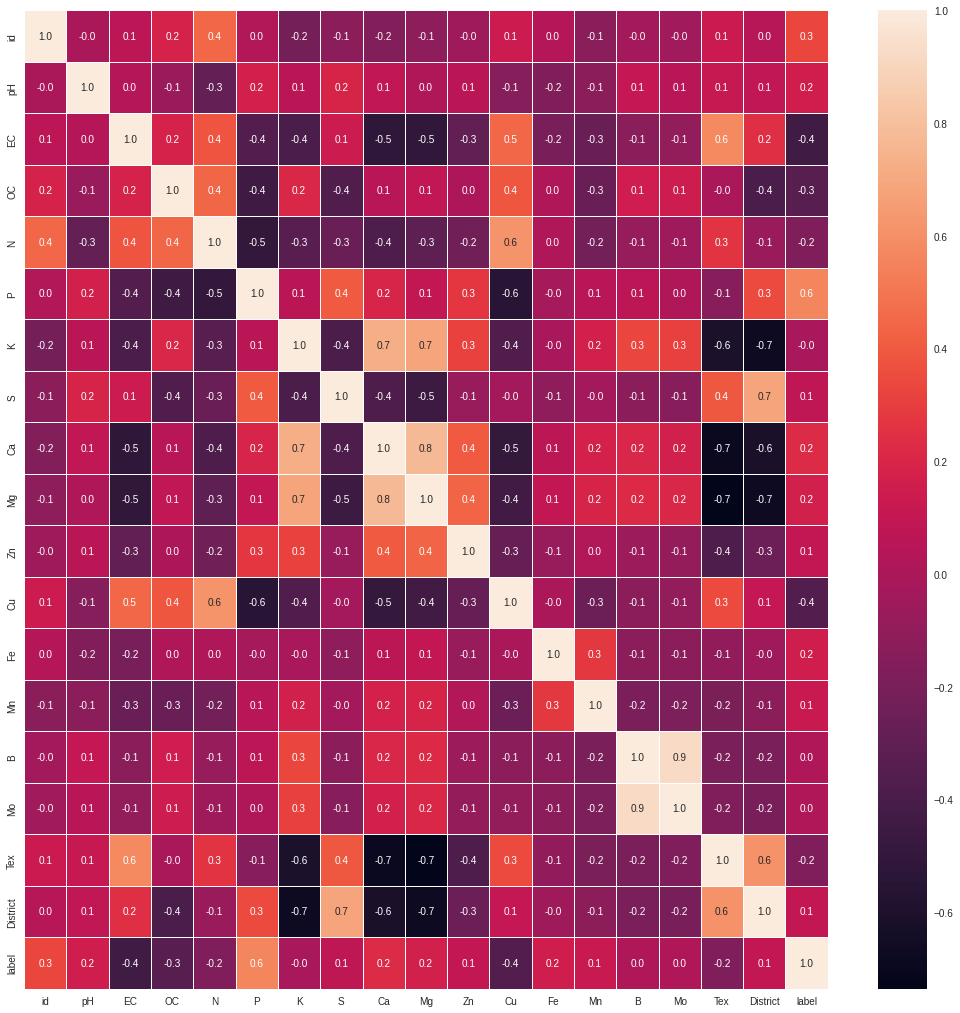

In [61]:
#sns.heatmap(df.corr(),annot=True,cmap='RdYlGn') #data.corr()-->correlation matrix
# HEATMAP SIZE 
f,ax = plt.subplots(figsize=(18, 18))   
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
#plt.show()
# plot save 
plt.savefig('graph.png')




In [62]:
from tensorflow.keras.utils import plot_model
print(m1.summary())
plot_model(m1, to_file='m1.png', show_shapes=False, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                540       
                                                                 
 dense_1 (Dense)             (None, 25)                775       
                                                                 
 dense_2 (Dense)             (None, 22)                572       
                                                                 
 dense_3 (Dense)             (None, 15)                345       
                                                                 
 dense_4 (Dense)             (None, 10)                160       
                                                                 
Total params: 2,392
Trainable params: 2,392
Non-trainable params: 0
_________________________________________________________________
None
You must install pydot (`pip install pydot`) and 

# ANN model-2

In [63]:
hp_hidden_units =20
hp_epoch = 10
hp_batch_size = 3
hp_lr = float(1/10)

In [64]:
l1 = Dense(20)
l2 = Dense(hp_hidden_units, activation = tf.nn.relu)
l3 = Dense(20, activation = tf.nn.relu)
l4 = Dense(10, activation = tf.nn.relu)
l5 = Dense(10, activation = tf.nn.softmax)
m2 = keras.models.Sequential(
    [l1, l2, l3, l4, l5]
)

In [65]:
import keras
from keras.callbacks import EarlyStopping


m2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           
           optimizer='rmsprop',
           metrics=["accuracy"])

In [66]:
history2 =m2.fit(X_train, y_train, batch_size= hp_batch_size, epochs=hp_epoch, validation_split=0.2,shuffle=True, verbose=1)

Epoch 1/10
584/584 [==============================] - 1s 2ms/step - loss: 2.0190 - accuracy: 0.4832 - val_loss: 1.7898 - val_accuracy: 0.6644
Epoch 2/10
584/584 [==============================] - 1s 2ms/step - loss: 1.6967 - accuracy: 0.8190 - val_loss: 1.6294 - val_accuracy: 0.8493
Epoch 3/10
584/584 [==============================] - 1s 2ms/step - loss: 1.5952 - accuracy: 0.8784 - val_loss: 1.5982 - val_accuracy: 0.8676
Epoch 4/10
584/584 [==============================] - 1s 2ms/step - loss: 1.5785 - accuracy: 0.8886 - val_loss: 1.5876 - val_accuracy: 0.8790
Epoch 5/10
584/584 [==============================] - 1s 2ms/step - loss: 1.5715 - accuracy: 0.8921 - val_loss: 1.5878 - val_accuracy: 0.8767
Epoch 6/10
584/584 [==============================] - 1s 2ms/step - loss: 1.5674 - accuracy: 0.8966 - val_loss: 1.5846 - val_accuracy: 0.8790
Epoch 7/10
584/584 [==============================] - 1s 2ms/step - loss: 1.5635 - accuracy: 0.8989 - val_loss: 1.5883 - val_accuracy: 0.8790
Epoch 

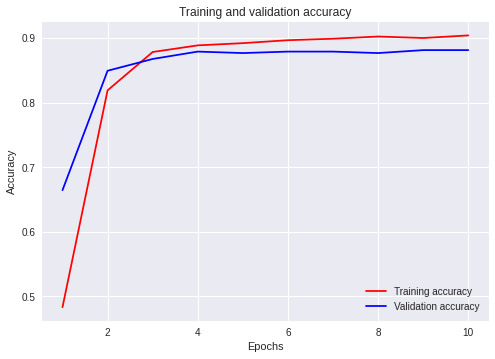

In [67]:
history_dict = history2.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot

# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

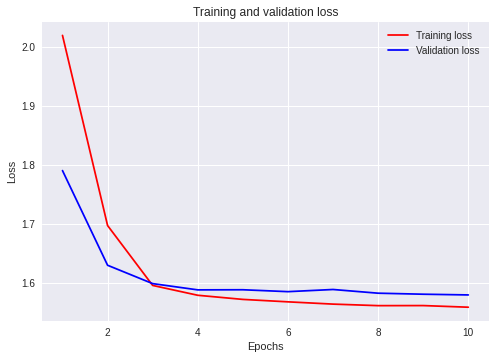

In [68]:
# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot

# "r" is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

18/18 [==============================] - 0s 678us/step
[1.7401760e-18 1.0008552e-11 1.4709615e-22 4.3754039e-10 8.4035621e-17
 3.5342295e-15 1.9242227e-04 9.9980766e-01 7.4225886e-12 2.3589113e-19]
1.0000001
              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97        92
         2.0       0.96      1.00      0.98        70
         3.0       1.00      0.91      0.96        82
         5.0       0.97      0.79      0.87        92
         6.0       0.77      0.68      0.72        69
         7.0       0.67      0.89      0.77        72
         8.0       1.00      1.00      1.00        71

    accuracy                           0.90       548
   macro avg       0.90      0.90      0.90       548
weighted avg       0.91      0.90      0.90       548



<AxesSubplot:>

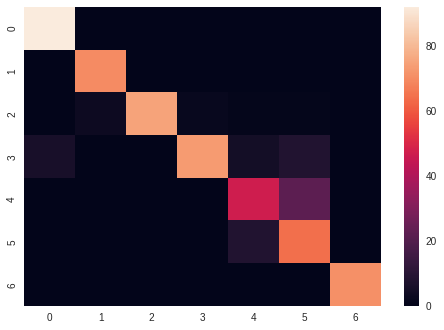

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.color_palette("Set2")
preds = m2.predict(X_test) 
print(preds[0]) 
print(np.sum(preds[0])) 

matrix = confusion_matrix(y_test, preds.argmax(axis=1))
matrix
print(classification_report(y_test, preds.argmax(axis=1)))
sns.heatmap(matrix)

In [70]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,preds.argmax(axis=1))
graph4=accuracy_score(y_test,preds.argmax(axis=1))

In [71]:
crop_name[y_test[102]]

['Pomegranate']

In [72]:
preds.argmax(axis=1)

array([7, 6, 6, 5, 2, 1, 7, 2, 8, 6, 8, 1, 1, 8, 5, 1, 3, 2, 5, 1, 7, 7,
       8, 7, 7, 3, 7, 2, 1, 7, 6, 1, 2, 2, 5, 1, 7, 5, 1, 5, 7, 7, 5, 6,
       7, 6, 2, 3, 7, 1, 5, 2, 1, 1, 8, 5, 6, 8, 6, 7, 7, 7, 7, 6, 6, 7,
       2, 3, 3, 7, 2, 5, 7, 3, 1, 8, 7, 5, 3, 5, 5, 3, 5, 6, 3, 2, 7, 2,
       7, 6, 8, 5, 2, 1, 6, 1, 7, 1, 1, 6, 1, 8, 5, 8, 6, 3, 1, 2, 2, 1,
       1, 8, 1, 1, 5, 6, 7, 6, 5, 8, 2, 3, 1, 6, 8, 2, 5, 5, 7, 5, 6, 2,
       2, 5, 5, 8, 3, 8, 1, 3, 5, 2, 2, 3, 5, 7, 3, 6, 7, 1, 2, 8, 1, 8,
       2, 7, 5, 1, 7, 5, 2, 5, 3, 2, 1, 1, 7, 7, 2, 1, 5, 2, 1, 2, 3, 8,
       5, 2, 5, 8, 1, 3, 7, 3, 5, 3, 2, 7, 2, 7, 8, 2, 3, 3, 8, 7, 7, 5,
       8, 5, 2, 7, 1, 1, 8, 5, 8, 6, 2, 6, 3, 6, 2, 8, 1, 1, 1, 6, 1, 1,
       1, 1, 2, 2, 3, 5, 1, 2, 1, 3, 2, 3, 8, 5, 1, 8, 7, 7, 3, 3, 8, 7,
       3, 7, 1, 8, 6, 7, 8, 1, 6, 1, 2, 1, 2, 8, 7, 7, 3, 1, 3, 3, 1, 1,
       8, 3, 7, 5, 6, 2, 6, 8, 3, 6, 2, 3, 3, 1, 7, 1, 1, 6, 8, 1, 7, 1,
       7, 3, 3, 5, 3, 8, 3, 1, 5, 7, 1, 1, 5, 7, 7,

In [73]:
from tensorflow.keras.utils import plot_model
print(m2.summary())
plot_model(m2, to_file='m2.png', show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                360       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,520
Trainable params: 1,520
Non-trainable params: 0
_________________________________________________________________
None
You must install pydot (`pip install pydot`) an

#random forest

In [74]:
labels = np.array(y)

In [75]:
features = np.array(X)

In [76]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


In [77]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2052, 17)
Training Labels Shape: (2052,)
Testing Features Shape: (685, 17)
Testing Labels Shape: (685,)


In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [79]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.01 degrees.


In [80]:
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
graph5= round(accuracy, 2)

Accuracy: 99.77 %.


In [98]:
y

0       6
1       7
2       7
3       6
4       6
       ..
2732    8
2733    8
2734    8
2735    8
2736    8
Name: label, Length: 2737, dtype: int64

# XG-boost


In [100]:
!pip install xgboost==1.5.0

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 MB 15.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.0
    Uninstalling xgboost-1.7.0:
      Successfully uninstalled xgboost-1.7.0


In [102]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [144]:
#modelXG = XGBClassifier(use_label_encoder=True, eval_metric='mlogloss')


In [145]:
#modelXG.fit(X_train, y_train)


In [146]:
#y_predxg = modelXG.predict(X_test)


In [147]:
#graph6 = accuracy_score(y_test, y_predxg)
#accuracy

In [148]:
#print(classification_report(y_test,y_predxg))


In [149]:
#acc_list=[graph,graph2,graph3,graph4,graph5,graph6]

NameError: name 'acc_list' is not defined

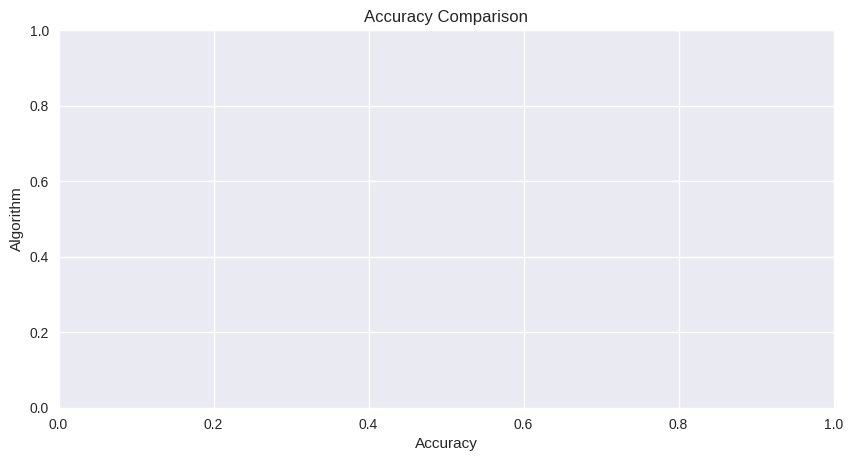

In [150]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=[10,5],dpi = 100)
# plt.title('Accuracy Comparison')
# plt.xlabel('Accuracy')
# plt.ylabel('Algorithm')
# sns.barplot(x = acc_list,y = index,palette='dark')

In [114]:
graph2=graph2/100

In [115]:
graph5=graph5/100


In [151]:
index= ['Decision Tree',"SVM","ANN M1","ANN M2","Random Forest"]

In [154]:
precison_list= [0.99,0.94,0.71,0.95,0.98]

<AxesSubplot:title={'center':'Precision'}, xlabel='Precision', ylabel='Algorithm'>

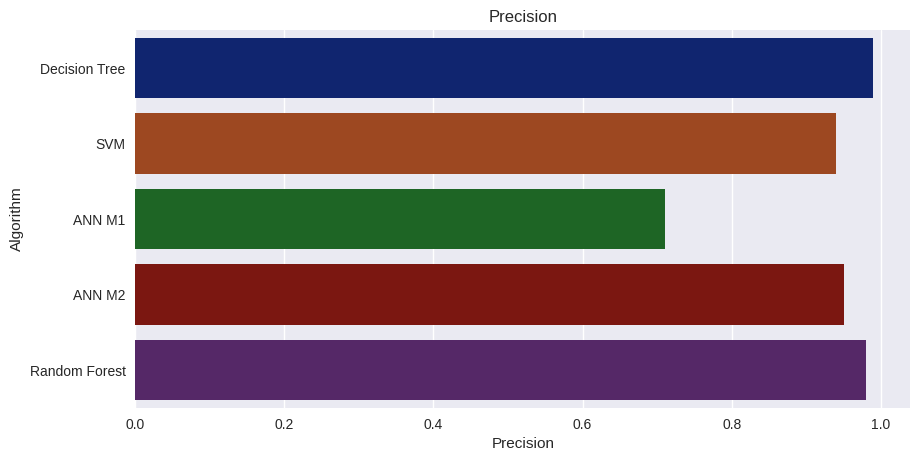

In [155]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Precision')
plt.xlabel('Precision')
plt.ylabel('Algorithm')
sns.barplot(x = precison_list,y = index,palette='dark')

# Prediction function

In [140]:
my = df[['pH', 'EC', 'OC', 'N', 'P', 'K', 'S', 'Ca', 'Mg', 'Zn', 'Cu',
       'Fe', 'Mn','Tex']]

In [141]:
ph = 5.6
ec = 0.12
oc = 8.46
n = 190.2
p = 20.42
k = 268.2
s = 9.4
ca = 1322
mg = 400
zn = 1.42
cu = 0.21
fe = 15.6
mn = 16.5
tex = 5

lst = [[ph, ec, oc, n, p, k, s, ca, mg, zn, cu, fe, mn, tex]]
arr = np.array(lst)
mean = np.array(my.mean())
std = np.array(my.std())
arr = (arr-mean)/std

In [143]:
pred = m2.predict(arr)
pred.argmax(axis=1)[0]
print(crop_name[pred.argmax(axis=1)[0]])

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/dense_5/MatMul' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/abhaylal/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/abhaylal/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/home/abhaylal/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/abhaylal/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/abhaylal/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_51272/757293731.py", line 1, in <cell line: 1>
      pred = m2.predict(arr)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1791, in predict_step
      return self(x, training=False)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/layers/core/dense.py", line 221, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'sequential_1/dense_5/MatMul'
Matrix size-incompatible: In[0]: [1,14], In[1]: [17,20]
	 [[{{node sequential_1/dense_5/MatMul}}]] [Op:__inference_predict_function_95144]

# District Prediction

In [121]:
X1 = df[['pH', 'EC', 'OC', 'N', 'P', 'K', 'S', 'Ca', 'Mg', 'Zn', 'Cu',
       'Fe', 'Mn','Tex']]
Y1 = df[['District']]

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y1.District= le.fit_transform(df.District.values)
X1.Tex= le.fit_transform(df.Tex.values)

/tmp/ipykernel_51272/716486913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y1.District= le.fit_transform(df.District.values)
/tmp/ipykernel_51272/716486913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.Tex= le.fit_transform(df.Tex.values)


In [123]:
X1

,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,Tex
0,7.050000,0.160000,5.560000,175.620000,38.260000,324.800000,5.210000,1884,288.000000,1.820000,0.200000,2.830000,2.800000,2
1,6.880000,0.089000,4.240000,125.440000,26.300000,103.000000,10.420000,1484,336.000000,1.620000,0.450000,6.270000,5.600000,2
2,5.600000,0.081000,2.780000,150.530000,25.700000,53.800000,7.810000,1644,504.000000,2.840000,0.440000,21.080000,24.110000,5
3,7.300000,0.164000,10.540000,188.160000,24.700000,190.400000,10.420000,1364,840.000000,7.740000,0.630000,16.420000,11.400000,2
4,7.220000,0.167000,11.410000,163.070000,40.000000,210.600000,10.420000,2004,168.000000,11.890000,0.610000,7.380000,2.910000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,6.531352,0.659126,17.283696,507.723181,28.210970,99.076266,464.099932,57,1.407825,0.908700,26.714008,20.307160,8.306451,14
2733,6.570766,0.672140,17.198919,507.854437,28.107230,99.429503,462.612618,60,1.410428,0.898288,25.791129,19.426670,8.329504,14
2734,6.989972,0.810557,16.297230,509.250472,27.003848,103.186541,446.793514,93,1.438111,0.787555,15.975375,10.061760,8.574701,16
2735,6.737222,0.727102,16.840881,508.408768,27.669104,100.921331,456.331240,73,1.421420,0.854319,21.893534,15.708094,8.426866,15


In [124]:
Y1['District'].unique()

array([0, 2, 1])

In [125]:
X1 = (X1 - X1.mean())/X1.std()
X1

,pH,EC,OC,N,P,K,S,Ca,Mg,Zn,Cu,Fe,Mn,Tex
0,1.048506,-1.037491,-1.677114,-1.226424,0.557077,1.249438,-1.023138,1.526581,0.178608,-0.192447,-0.946238,-1.027180,-0.943989,-2.426073
1,0.650186,-1.200279,-1.911359,-1.594217,-0.124451,-0.593699,-1.014431,1.071609,0.288384,-0.255630,-0.931182,-0.754868,-0.599579,-2.426073
2,-2.348933,-1.218622,-2.170448,-1.410321,-0.158642,-1.002546,-1.018793,1.253598,0.672599,0.129790,-0.931784,0.417502,1.677216,-1.721297
3,1.634272,-1.028320,-0.793373,-1.134513,-0.215626,0.132587,-1.014431,0.935117,1.441030,1.677788,-0.920342,0.048613,0.113841,-2.426073
4,1.446827,-1.021441,-0.638984,-1.318409,0.656229,0.300447,-1.014431,1.663073,-0.095832,2.988847,-0.921546,-0.666999,-0.930458,-2.426073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,-0.166718,0.106901,0.403351,1.207717,-0.015557,-0.626305,-0.256227,-0.551505,-0.476827,-0.480343,0.650537,0.356323,-0.266676,0.393030
2733,-0.074369,0.136739,0.388306,1.208679,-0.021468,-0.623369,-0.258713,-0.548092,-0.476821,-0.483632,0.594957,0.286623,-0.263840,0.393030
2734,0.907857,0.454101,0.228294,1.218911,-0.084343,-0.592149,-0.285150,-0.510557,-0.476758,-0.518615,0.003815,-0.454709,-0.233680,0.862880
2735,0.315649,0.262756,0.324770,1.212742,-0.046434,-0.610972,-0.269211,-0.533306,-0.476796,-0.497523,0.360229,-0.007742,-0.251865,0.627955


In [126]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(2189, 14) (548, 14) (2189, 1) (548, 1)


In [127]:
X1_train = np.asarray(X1_train).astype(np.float32)

X1_test = np.asarray(X1_test).astype(np.float32)


In [128]:
hp_hidden_units = 45
hp_epoch = 10
hp_batch_size = 3
hp_lr = float(1/10)

In [129]:
l1 = Dense(40)
l2 = Dense(35, activation = tf.nn.relu)
l3 = Dense(20)
l4 = Dense(10, activation = tf.nn.softmax)
d = keras.models.Sequential(
    [l1, l2, l3, l4]
)


In [130]:
from tensorflow.keras.layers import Flatten, Dense, InputLayer

In [131]:
d.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
           optimizer='adam',
           metrics=["accuracy"])


In [132]:
history3 =d.fit(X1_train, y1_train, batch_size= 10, epochs=3)

Epoch 1/3
219/219 [==============================] - 0s 1ms/step - loss: 1.5909 - accuracy: 0.9379
Epoch 2/3
219/219 [==============================] - 0s 1ms/step - loss: 1.4752 - accuracy: 0.9872
Epoch 3/3
219/219 [==============================] - 0s 1ms/step - loss: 1.4741 - accuracy: 0.9877


In [133]:
districts = { 0 : ["Almora"], 1 : ["Tehri"], 2 : ["Chamoli"]}

In [134]:
predsd = d.predict(X1_test)

18/18 [==============================] - 0s 592us/step


In [135]:
districts[np.argmax(predsd[50])]

['Almora']

In [136]:
d.save('district.h5')

#Fertility Scale

In [137]:
n = 0
p = 0
k = 0
s = 0
oc = 0
ca = 0
score = 0

label = []

In [138]:
for i in range(df.shape[0]):
    if(df.loc[i]['N']<=280):
        n=1
    elif(df.loc[i]['N']>280 and df.loc[i]['N']<=560):
        n=2
    elif(df.loc[i]['N']>560):
        n=3
        
        
    
    if(df.loc[i]['P']<=10):
        p=1
    elif(df.loc[i]['P']>10 and df.loc[i]['P']<=24.6):
        p=2
    elif(df.loc[i]['P']>24.6):
        p=3
        
        
        
    if(df.loc[i]['K']<=117.6):
        k=1
    elif(df.loc[i]['K']>117.6 and df.loc[i]['K']<=280):
        k=2
    elif(df.loc[i]['K']>280):
        k=3
        
    if(df.loc[i]['S']<=10):
        s=1
    elif(df.loc[i]['S']>10 and df.loc[i]['S']<=20):
        s=2
    elif(df.loc[i]['S']>20):
        s=3
        
    if(df.loc[i]['OC']<=0.5):
        oc=3
    elif(df.loc[i]['OC']>0.5 and df.loc[i]['OC']<=0.75):
        oc=6
    elif(df.loc[i]['OC']>0.75):
        oc=9
        
    if(df.loc[i]['Ca']<=2500):
        ca=1
    elif(df.loc[i]['Ca']>2500 and df.loc[i]['Ca']<=4000):
        ca=2
    elif(df.loc[i]['Ca']>4000):
        ca=3   
        
    score = ((n+p+k+s+oc+ca)*10)/28.35
    
    
    label.append((score))

<AxesSubplot:ylabel='Count'>

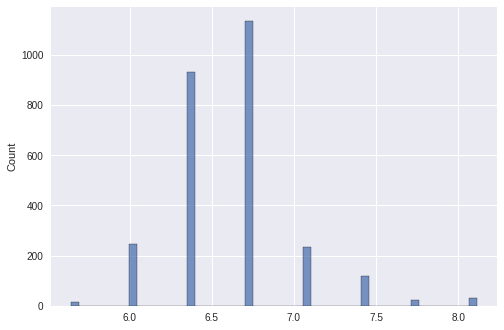

In [139]:
sns.histplot(label)